In [1]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [6]:
annFile = 'data/coco/captions_val2014.json'
resFile = 'results/resnet2.json'


In [7]:
# create coco object and cocoRes object
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
0:00:01.624097
creating index...
index created!
Loading and preparing results...     
DONE (t=0.23s)
creating index...
index created!


In [8]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 350269, 'guess': [304014, 263564, 223205, 182984], 'testlen': 304014, 'correct': [179309, 51295, 11476, 2432]}
ratio: 0.867944351341
Bleu_1: 0.507
Bleu_2: 0.291
Bleu_3: 0.155
Bleu_4: 0.081
computing METEOR score...
METEOR: 0.153
computing Rouge score...
ROUGE_L: 0.347
computing CIDEr score...
CIDEr: 0.414


In [9]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print '%s: %.3f'%(metric, score)

CIDEr: 0.414
Bleu_4: 0.081
Bleu_3: 0.155
Bleu_2: 0.291
Bleu_1: 0.507
ROUGE_L: 0.347
METEOR: 0.153


In [ ]:
# demo how to use evalImgs to retrieve low score result
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<30]
print 'ground truth captions'
imgId = evals[0]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print '\n'
print 'generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr'])
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

img = coco.loadImgs(imgId)[0]
I = io.imread('data/coco/val2014/%s'% img['file_name'])
plt.imshow(I)
plt.axis('off')
plt.show()

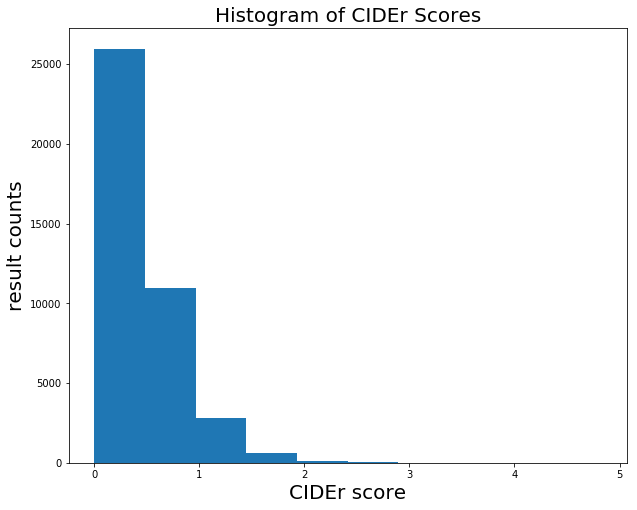

In [10]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

In [ ]:
# save evaluation results to ./results folder
json.dump(cocoEval.evalImgs, open(evalImgsFile, 'w'))
json.dump(cocoEval.eval,     open(evalFile, 'w'))